In [ ]:
import pandas as pd
import numpy as np
import math
from scipy.stats import norm
from matplotlib import pyplot as plt
plt.style.use("ggplot")

# Calculando

## Call

In [ ]:
# Defina os parâmetros
S = 100  # Preço atual da ação
K = 105  # Preço de exercício da opção
T = 1    # Tempo até a expiração em anos
r = 0.05 # Taxa de juros livre de risco
sigma = 0.2  # Volatilidade do ativo

In [ ]:
# Calcule os componentes do modelo de Black-Scholes
d1 = (math.log(S / K) + (r + (sigma ** 2) / 2) * T) / (sigma * math.sqrt(T))
d2 = d1 - sigma * math.sqrt(T)

# Calcule o valor da opção de compra (Call)
call_option_price = S * math.exp(-r * T) * norm.cdf(d1) - K * math.exp(-r * T) * norm.cdf(d2)


print(f"O preço da opção de compra é: {call_option_price:.3f}")

O preço da opção de compra é: 5.377


## Put

In [ ]:
# Defina os parâmetros
S = 100  # Preço atual da ação
K = 105  # Preço de exercício da opção
T = 1    # Tempo até a expiração em anos
r = 0.05 # Taxa de juros livre de risco
sigma = 0.2  # Volatilidade do ativo

# Calcule os componentes do modelo de Black-Scholes
d1 = (math.log(S / K) + (r + (sigma ** 2) / 2) * T) / (sigma * math.sqrt(T))
d2 = d1 - sigma * math.sqrt(T)

# Calcule o valor da opção de venda (Put)
put_option_price = K * math.exp(-r * T) * norm.cdf(-d2) - S * math.exp(-r * T) * norm.cdf(-d1)

print(f"O preço da opção de venda é: {put_option_price:.3f}")

O preço da opção de venda é: 10.133


# Lendo os Dados

In [ ]:
## Séries históricas disponíveis em:
## http://www.b3.com.br/pt_br/market-data-e-indices/servicos-de-dados/market-data/historico/mercado-a-vista/series-historicas/
arquivo_bovespa = 'COTAHIST_A2023.TXT'


## Estrutura do arquivo disponível em
## http://www.b3.com.br/data/files/33/67/B9/50/D84057102C784E47AC094EA8/SeriesHistoricas_Layout.pdf
tamanho_campos = [2,8,2,12,3,12,10,3,4,13,13,13,13,13,13,13,5,18,18,13,1,8,7,13,12,3]
dados_acoes = pd.read_fwf(arquivo_bovespa, widths=tamanho_campos, header=0)
dados_acoes

,00,COTAHIST,.2,023BOVESPA 2,023,0925,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Unnamed: 21,Unnamed: 22,Unnamed: 23,Unnamed: 24,Unnamed: 25
0,1,20230102,2.0,NEOE3,10,NEOENERGIA,ON NM,NaN,R$,1540.0,...,1916.0,325000.0,490215100.0,0.0,0.0,99991231.0,1.0,0.0,BRNEOEACNOR3,117.0
1,1,20230102,2.0,NEXP3,10,NEXPE,ON NM,NaN,R$,31.0,...,255.0,197700.0,5898000.0,0.0,0.0,99991231.0,1.0,0.0,BRNEXPACNOR0,100.0
2,1,20230102,2.0,NGRD3,10,NEOGRID,ON NM,NaN,R$,148.0,...,1011.0,589900.0,86150900.0,0.0,0.0,99991231.0,1.0,0.0,BRNGRDACNOR3,102.0
3,1,20230102,2.0,NINJ3,10,GETNINJAS,ON NM,NaN,R$,270.0,...,421.0,76000.0,20792600.0,0.0,0.0,99991231.0,1.0,0.0,BRNINJACNOR5,100.0
4,1,20230102,2.0,NORD3,10,NORDON MET,ON,NaN,R$,848.0,...,17.0,2700.0,2314300.0,0.0,0.0,99991231.0,1.0,0.0,BRNORDACNOR7,135.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1681211,1,20230925,82.0,YDUQW187,80,YDUQE FM,ON NM,0.0,R$,123.0,...,1.0,200.0,24600.0,1873.0,0.0,20231117.0,1.0,0.0,BRYDUQACNOR3,104.0
1681212,1,20230925,82.0,YDUQW192,80,YDUQE FM,ON NM,0.0,R$,150.0,...,14.0,14200.0,2127000.0,1923.0,0.0,20231117.0,1.0,0.0,BRYDUQACNOR3,104.0
1681213,1,20230925,82.0,YDUQW197,80,YDUQE FM,ON NM,0.0,R$,175.0,...,11.0,11000.0,1924000.0,1973.0,0.0,20231117.0,1.0,0.0,BRYDUQACNOR3,104.0
1681214,1,20230925,82.0,YDUQW167,80,YDUQE,ON NM,0.0,R$,60.0,...,12.0,4800.0,274300.0,1673.0,0.0,20231117.0,1.0,0.0,BRYDUQACNOR3,104.0


In [ ]:
## Nomear as colunas

dados_acoes.columns = [
"tipo_registro",
"data_pregao",
"cod_bdi",
"cod_negociacao",
"tipo_mercado",
"noma_empresa",
"especificacao_papel",
"prazo_dias_merc_termo",
"moeda_referencia",
"preco_abertura",
"preco_maximo",
"preco_minimo",
"preco_medio",
"preco_ultimo_negocio",
"preco_melhor_oferta_compra",
"preco_melhor_oferta_venda",
"numero_negocios",
"quantidade_papeis_negociados",
"volume_total_negociado",
"preco_exercicio",
"ìndicador_correcao_precos",
"data_vencimento" ,
"fator_cotacao",
"preco_exercicio_pontos",
"codigo_isin",
"num_distribuicao_papel"]

# Eliminar a última linha
linha=len(dados_acoes["data_pregao"])
dados_acoes=dados_acoes.drop(linha-1)

# Ajustar valores com virgula (dividir os valores dessas colunas por 100)
listaVirgula=[
"preco_abertura",
"preco_maximo",
"preco_minimo",
"preco_medio",
"preco_ultimo_negocio",
"preco_melhor_oferta_compra",
"preco_melhor_oferta_venda",
"volume_total_negociado",
"preco_exercicio",
"preco_exercicio_pontos"
]

for coluna in listaVirgula:
    dados_acoes[coluna]=[i/100. for i in dados_acoes[coluna]]

In [ ]:
dados_acoes.head()

,tipo_registro,data_pregao,cod_bdi,cod_negociacao,tipo_mercado,noma_empresa,especificacao_papel,prazo_dias_merc_termo,moeda_referencia,preco_abertura,...,numero_negocios,quantidade_papeis_negociados,volume_total_negociado,preco_exercicio,ìndicador_correcao_precos,data_vencimento,fator_cotacao,preco_exercicio_pontos,codigo_isin,num_distribuicao_papel
0,1,20230102,2.0,NEOE3,10,NEOENERGIA,ON NM,NaN,R$,15.40,...,1916.0,325000.0,4902151.0,0.0,0.0,99991231.0,1.0,0.0,BRNEOEACNOR3,117.0
1,1,20230102,2.0,NEXP3,10,NEXPE,ON NM,NaN,R$,0.31,...,255.0,197700.0,58980.0,0.0,0.0,99991231.0,1.0,0.0,BRNEXPACNOR0,100.0
2,1,20230102,2.0,NGRD3,10,NEOGRID,ON NM,NaN,R$,1.48,...,1011.0,589900.0,861509.0,0.0,0.0,99991231.0,1.0,0.0,BRNGRDACNOR3,102.0
3,1,20230102,2.0,NINJ3,10,GETNINJAS,ON NM,NaN,R$,2.70,...,421.0,76000.0,207926.0,0.0,0.0,99991231.0,1.0,0.0,BRNINJACNOR5,100.0
4,1,20230102,2.0,NORD3,10,NORDON MET,ON,NaN,R$,8.48,...,17.0,2700.0,23143.0,0.0,0.0,99991231.0,1.0,0.0,BRNORDACNOR7,135.0


In [ ]:
dados_acoes.info()

# Aplicando os Dados

In [ ]:
dados_acoes['tipo_mercado'].unique()

array([10, 20, 17, 70, 30, 80, 12, 13], dtype=int64)

In [ ]:
# Alguns tipos de mercado

# 10 - Mercado à vista
# 70 - Opções de Compra
# 80 - Opções de Venda

dados_acoes[dados_acoes['tipo_mercado']==70]

,tipo_registro,data_pregao,cod_bdi,cod_negociacao,tipo_mercado,noma_empresa,especificacao_papel,prazo_dias_merc_termo,moeda_referencia,preco_abertura,...,numero_negocios,quantidade_papeis_negociados,volume_total_negociado,preco_exercicio,ìndicador_correcao_precos,data_vencimento,fator_cotacao,preco_exercicio_pontos,codigo_isin,num_distribuicao_papel
205372,1,20230102,78.0,ABCBA200,70,ABCB /EJ,PN N2,0.0,R$,0.19,...,1.0,200.0,38.0,19.69,0.0,20230120.0,1.0,0.0,BRABCBACNPR4,142.0
205375,1,20230102,78.0,ABEVB15,70,ABEV,ON,0.0,R$,1.00,...,27.0,37700.0,34843.0,13.82,0.0,20230217.0,1.0,0.0,BRABEVACNOR1,124.0
205376,1,20230102,78.0,ABEVD300,70,ABEV,ON,0.0,R$,0.07,...,2.0,1100.0,47.0,18.82,0.0,20230420.0,1.0,0.0,BRABEVACNOR1,124.0
205377,1,20230102,78.0,ABEVF160,70,ABEV,ON,0.0,R$,1.20,...,6.0,5300.0,6150.0,14.82,0.0,20230616.0,1.0,0.0,BRABEVACNOR1,124.0
205386,1,20230102,78.0,ABEVL144,70,ABEV,ON,0.0,R$,2.65,...,2.0,200.0,523.0,13.82,0.0,20231215.0,1.0,0.0,BRABEVACNOR1,125.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1681203,1,20230925,78.0,YDUQK207,70,YDUQ FM,ON NM,0.0,R$,1.08,...,7.0,26900.0,29123.0,20.73,0.0,20231117.0,1.0,0.0,BRYDUQACNOR3,104.0
1681204,1,20230925,78.0,YDUQK212,70,YDUQ FM,ON NM,0.0,R$,0.86,...,2.0,1200.0,1052.0,21.23,0.0,20231117.0,1.0,0.0,BRYDUQACNOR3,104.0
1681205,1,20230925,78.0,YDUQK217,70,YDUQ,ON NM,0.0,R$,0.69,...,2.0,1700.0,1248.0,21.73,0.0,20231117.0,1.0,0.0,BRYDUQACNOR3,104.0
1681206,1,20230925,78.0,YDUQK222,70,YDUQ,ON NM,0.0,R$,0.64,...,1.0,1000.0,640.0,22.23,0.0,20231117.0,1.0,0.0,BRYDUQACNOR3,104.0


# Analisando

In [ ]:
## Buscando cotações de ABEV3
dados_acoes[(dados_acoes['tipo_mercado']==10)&(dados_acoes['cod_negociacao']=='ABEV3')][['data_pregao','preco_ultimo_negocio']]

,data_pregao,preco_ultimo_negocio
20,20230102,14.19
1654,20230103,14.17
3181,20230104,14.25
4848,20230105,14.29
6533,20230106,14.32
...,...,...
1238399,20230919,13.43
1239722,20230920,13.47
1241440,20230921,13.24
1243218,20230922,13.12


In [ ]:
# Buscando todas as opções de ABEV com mais de 100 negocios realizados
dados_acoes[(dados_acoes['tipo_mercado']==70)&dados_acoes['cod_negociacao'].str.contains("ABEV")&(dados_acoes['numero_negocios']>100)]

,tipo_registro,data_pregao,cod_bdi,cod_negociacao,tipo_mercado,noma_empresa,especificacao_papel,prazo_dias_merc_termo,moeda_referencia,preco_abertura,...,numero_negocios,quantidade_papeis_negociados,volume_total_negociado,preco_exercicio,ìndicador_correcao_precos,data_vencimento,fator_cotacao,preco_exercicio_pontos,codigo_isin,num_distribuicao_papel
205408,1,20230102,78.0,ABEVA15,70,ABEV FM,ON,0.0,R$,0.41,...,141.0,821200.0,245667.0,14.42,0.0,20230120.0,1.0,0.0,BRABEVACNOR1,125.0
205410,1,20230102,78.0,ABEVA160,70,ABEV FM,ON,0.0,R$,0.10,...,130.0,574600.0,43311.0,15.42,0.0,20230120.0,1.0,0.0,BRABEVACNOR1,125.0
211590,1,20230103,78.0,ABEVA15,70,ABEV FM,ON,0.0,R$,0.33,...,158.0,647900.0,214606.0,14.42,0.0,20230120.0,1.0,0.0,BRABEVACNOR1,125.0
218018,1,20230104,78.0,ABEVA15,70,ABEV FM,ON,0.0,R$,0.32,...,108.0,885300.0,278865.0,14.42,0.0,20230120.0,1.0,0.0,BRABEVACNOR1,125.0
218019,1,20230104,78.0,ABEVA155,70,ABEV FM,ON,0.0,R$,0.13,...,258.0,1094900.0,147051.0,14.92,0.0,20230120.0,1.0,0.0,BRABEVACNOR1,125.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1668984,1,20230922,78.0,ABEVJ133,70,ABEV FM,ON,0.0,R$,0.32,...,756.0,1402600.0,419839.0,13.32,0.0,20231020.0,1.0,0.0,BRABEVACNOR1,126.0
1668985,1,20230922,78.0,ABEVJ138,70,ABEV FM,ON,0.0,R$,0.10,...,118.0,259100.0,26369.0,13.82,0.0,20231020.0,1.0,0.0,BRABEVACNOR1,126.0
1669001,1,20230922,78.0,ABEVJ135,70,ABEVE,ON,0.0,R$,0.17,...,231.0,365700.0,65106.0,13.57,0.0,20231020.0,1.0,0.0,BRABEVACNOR1,126.0
1675022,1,20230925,78.0,ABEVJ133,70,ABEV FM,ON,0.0,R$,0.26,...,126.0,791600.0,243581.0,13.32,0.0,20231020.0,1.0,0.0,BRABEVACNOR1,126.0


In [ ]:
nome_opcao = "ABEVA160"

In [ ]:
dados_acoes[(dados_acoes['tipo_mercado']==70)&(dados_acoes['cod_negociacao']==nome_opcao)][["preco_exercicio","tipo_mercado"]].head(1)

,preco_exercicio,tipo_mercado
205410,15.42,70


In [ ]:
acao = dados_acoes[(dados_acoes['tipo_mercado']==10)&(dados_acoes['cod_negociacao']=='ABEV3')][['data_pregao','preco_ultimo_negocio']]

In [ ]:
opcao = dados_acoes[(dados_acoes['tipo_mercado']==70)&(dados_acoes['cod_negociacao']==nome_opcao)]
opcao = opcao[["data_pregao","preco_ultimo_negocio"]]

In [ ]:
opcao_acao = acao.merge(opcao, on='data_pregao', how='inner')

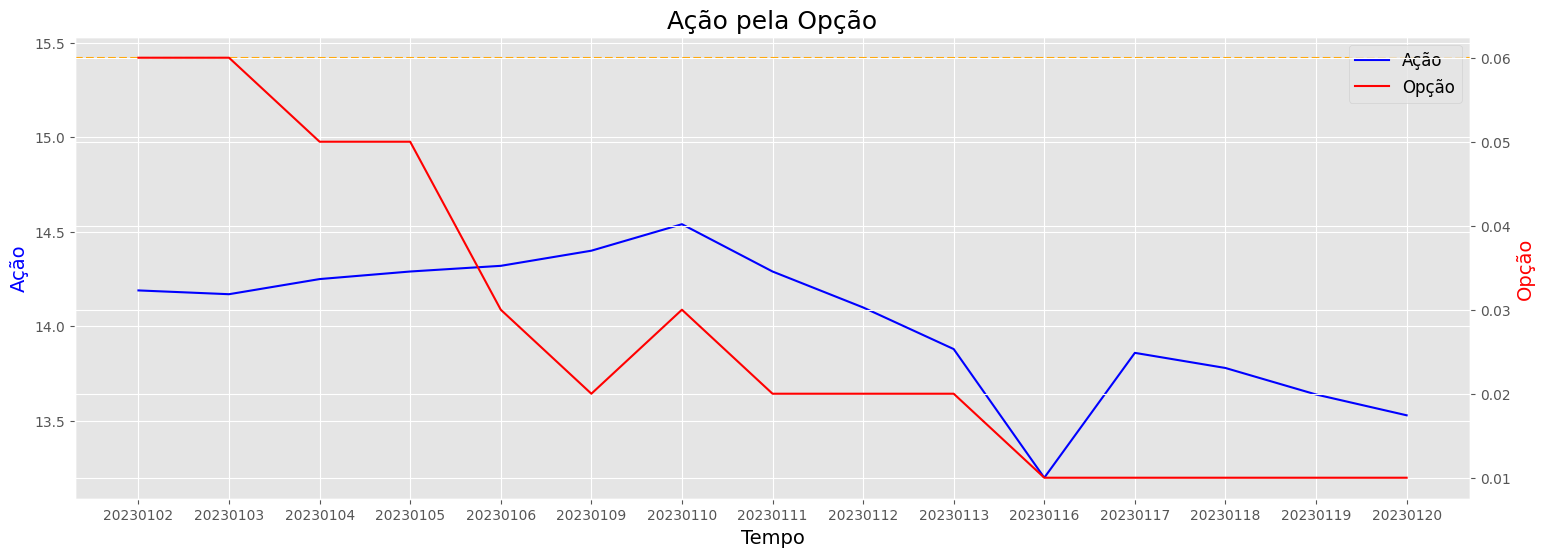

In [ ]:
# Crie o primeiro gráfico
fig, ax1 = plt.subplots(figsize=(18,6))

# Plote os dados no primeiro gráfico
ax1.plot(opcao_acao["data_pregao"], opcao_acao["preco_ultimo_negocio_x"], 'b-', label='Ação')
ax1.set_xlabel('Tempo', fontsize=14,)
ax1.set_ylabel('Ação', fontsize=14, color='b')
ax1.axhline(15.42, color="orange", linestyle="dashed")

# Crie o segundo eixo y
ax2 = ax1.twinx()

# Plote os dados no segundo gráfico
ax2.plot(opcao_acao["data_pregao"], opcao_acao["preco_ultimo_negocio_y"], 'r-', label='Opção')
ax2.set_ylabel('Opção', fontsize=14, color='r')

# Adicione uma legenda
lines1, labels1 = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
lines = lines1 + lines2
labels = labels1 + labels2
ax1.legend(lines, labels, loc='upper right', fontsize=12)

plt.title('Ação pela Opção', fontsize=18)
plt.show()